# Task 1

In [1]:
# Some of the steps in this task are identical to the ones in the last homework

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
# upload and read the file
# source: https://www.kaggle.com/datasets/gabrielsantello/cars-purchase-decision-dataset?resource=download
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('drive/MyDrive/datasets/car_data.csv')

Mounted at /content/drive


In [3]:
# Detects missing values
df.isna().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [4]:
# Describes the statistics of the numerical data
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [5]:
# Check if this is a balanced data
df.Purchased.value_counts(normalize=True)

0    0.598
1    0.402
Name: Purchased, dtype: float64

Text(0, 0.5, 'AnnualSalary')

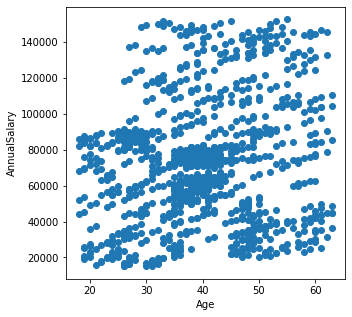

In [6]:
# Using scatter plot to identify the relationship of age and annual salary
ig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df.Age, df.AnnualSalary)
ax.set_xlabel('Age')
ax.set_ylabel('AnnualSalary')

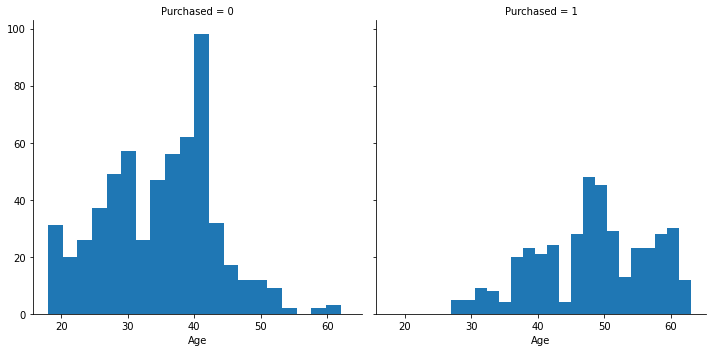

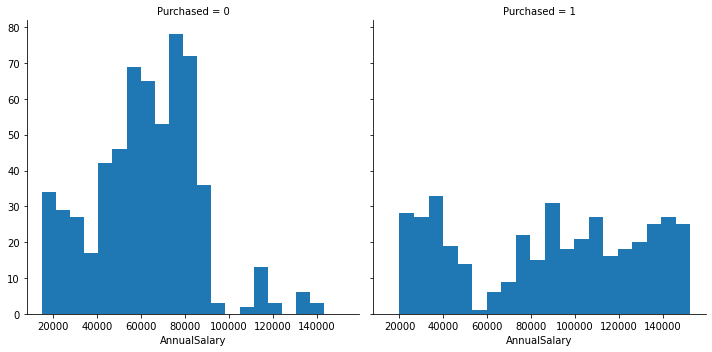

In [7]:
g = sns.FacetGrid(df, col='Purchased', height=5)
g.map(plt.hist, 'Age', bins=20)
g = sns.FacetGrid(df, col='Purchased', height=5)
g.map(plt.hist, 'AnnualSalary', bins=20)

In [8]:
# Convert all sex labels to numerical values
df.Gender = df.Gender.map({ 'Male': 0, 'Female': 1 })

In [9]:
# Data partitioning
X = df.drop(['Purchased'], axis=1)
y = df.Purchased
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
transformer = Normalizer(norm='max').fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [10]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 

def DecisionTree(X_train, y_train, X_test, y_test, max_depth=8, max_features=None):
  start = time.time()
  clf = DecisionTreeClassifier(random_state=0, max_depth=max_depth, max_features=max_features).fit(X_train, y_train)
  y_pred_clf = clf.predict(X_test)
  end = time.time()
  print('Time spent: '+str(end-start))
  print('Accuracy: '+str(accuracy_score(y_test, y_pred_clf)))
  print('Tree Graph:')
  plt.figure(figsize=(12,12))
  tree.plot_tree(clf, fontsize=10)
  plt.show()
  

Time spent: 0.006949186325073242
Accuracy: 0.76
Tree Graph:


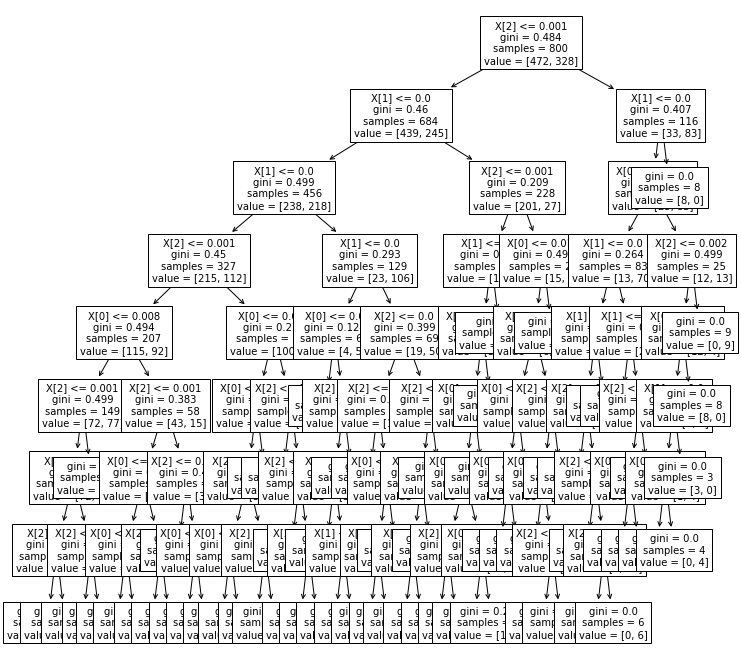

Time spent: 0.003594636917114258
Accuracy: 0.775
Tree Graph:


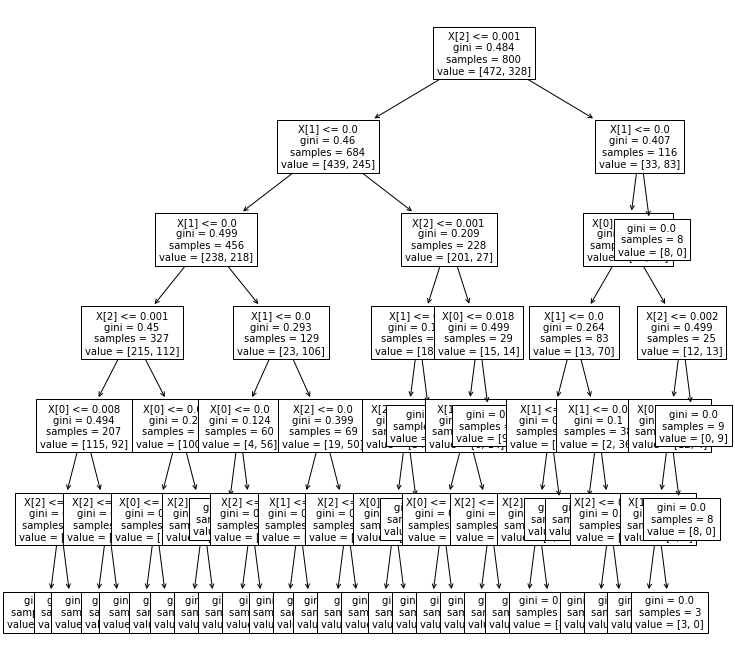

Time spent: 0.003048419952392578
Accuracy: 0.755
Tree Graph:


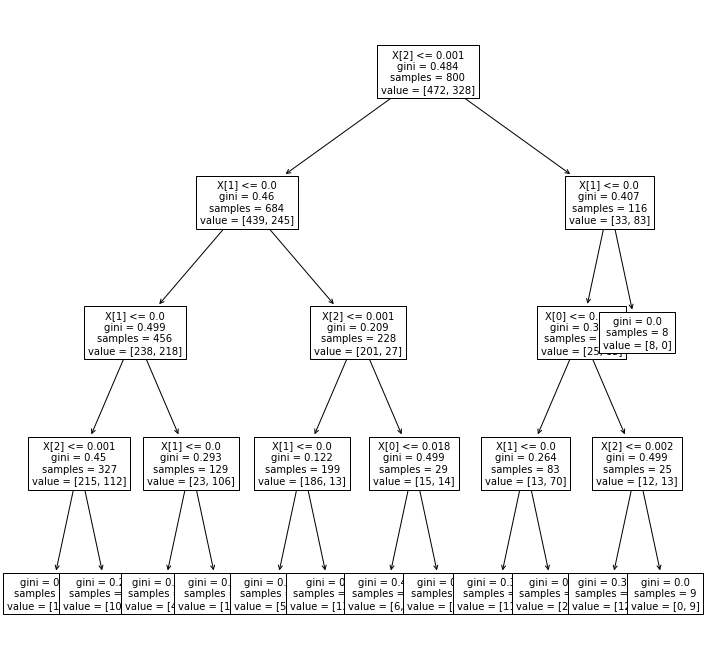

In [11]:
# max_depth parameter comparison
DecisionTree(X_train, y_train, X_test, y_test, max_depth=8)
DecisionTree(X_train, y_train, X_test, y_test, max_depth=6)
DecisionTree(X_train, y_train, X_test, y_test, max_depth=4)

Changing the max_depth parameter will limit the depth of the tree. As shown in the graphs, trees with the smaller max_depth value has less hight and less nodes and less leaves. Within the reasonable range of not overfitting, models with the less max_height value tend to have less accuracy but faster runtime. 

Time spent: 0.0030608177185058594
Accuracy: 0.76
Tree Graph:


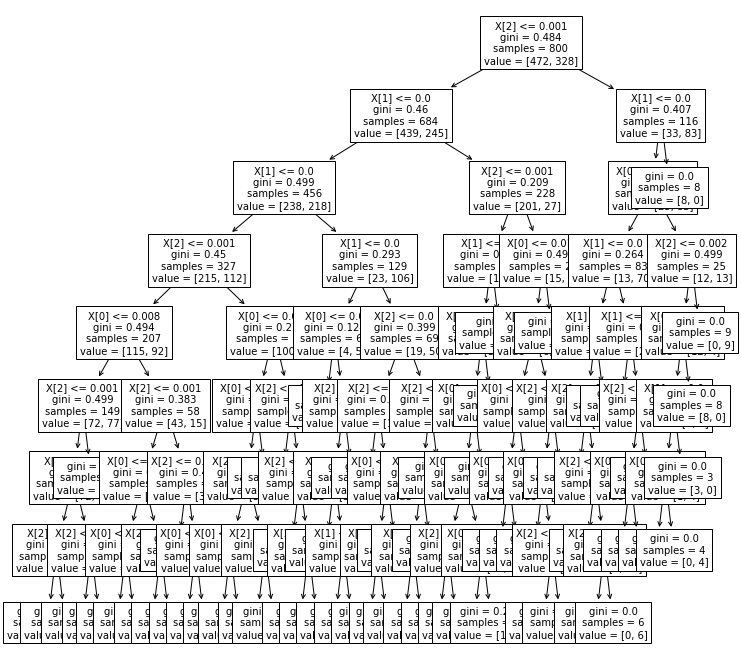

Time spent: 0.0034720897674560547
Accuracy: 0.745
Tree Graph:


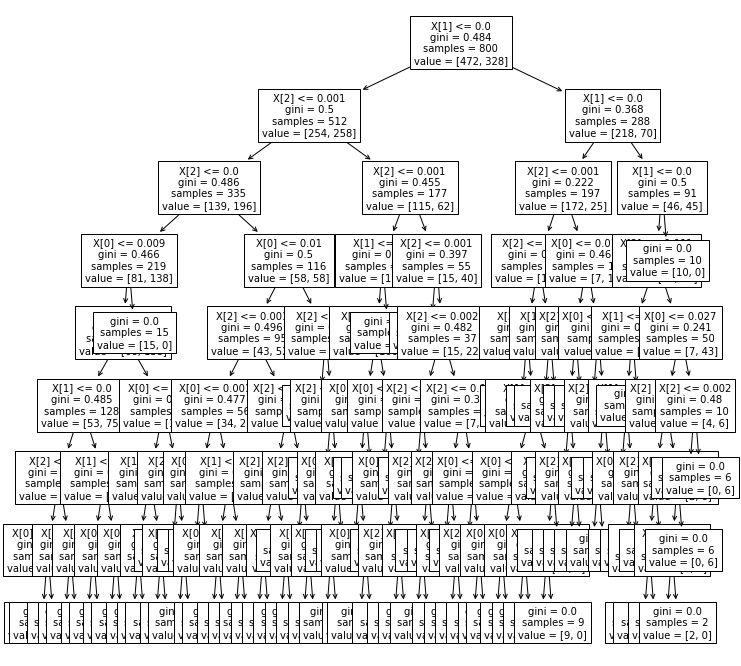

Time spent: 0.0073621273040771484
Accuracy: 0.745
Tree Graph:


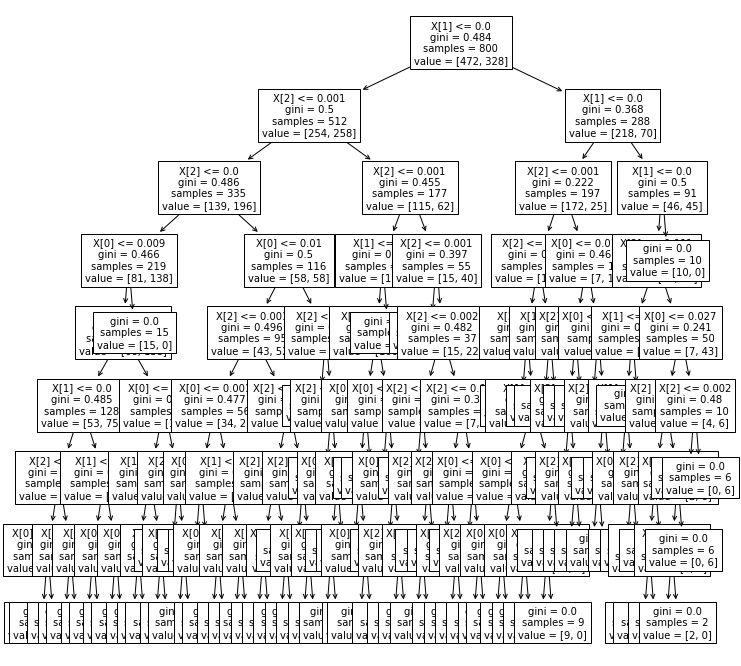

In [12]:
# min_samples_split parameter comparison
DecisionTree(X_train, y_train, X_test, y_test, max_features=None)
DecisionTree(X_train, y_train, X_test, y_test, max_features='sqrt')
DecisionTree(X_train, y_train, X_test, y_test, max_features='log2')

Decreasing max_features will limit the model to consider less features when looking for the next split. Models with less max_features will be less accurate but takes less time.

# Task 2


Time spent: 6.979641437530518
Accuracy: 0.765 (0.070)


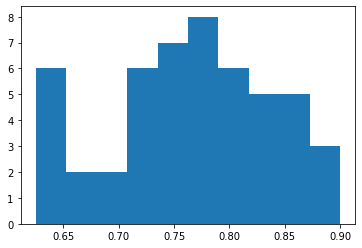

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import std

cv = RepeatedStratifiedKFold()

start = time.time()
model_ran = RandomForestClassifier().fit(X_train, y_train)
n_scores_ran = cross_val_score(model_ran, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
end = time.time()
print('Time spent: '+str(end-start))
print('Accuracy: %.3f (%.3f)' % (mean(n_scores_ran), std(n_scores_ran)))
fig, ax = plt.subplots()
ax.hist(n_scores_ran)
plt.show()

Time spent: 5.6963958740234375
Accuracy: 0.716 (0.068)


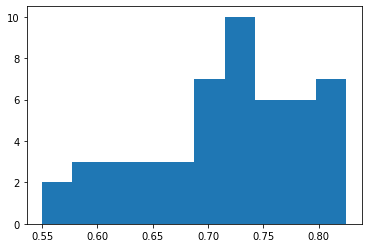

In [14]:
from sklearn.ensemble import AdaBoostClassifier

start = time.time()
model_ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.3).fit(X_train, y_train)
n_scores_ada = cross_val_score(model_ada, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
end = time.time()
print('Time spent: '+str(end-start))
print('Accuracy: %.3f (%.3f)' % (mean(n_scores_ada), std(n_scores_ada)))
fig, ax = plt.subplots()
ax.hist(n_scores_ada)
plt.show()

The code above uses Random Forest Classifier and Ada Boost Classifier. The first one is a bagging ensemble method, and the second one is a boosting ensemble method. The two algorithm are very similar in terms of performance. Random Forest Classifier takes a bit more time than Ada Boost Classifier, and has a slightly higher accuracy.

# Task 3


Time spent: 0.130446195602417
Accuracy: 0.714 (0.072)


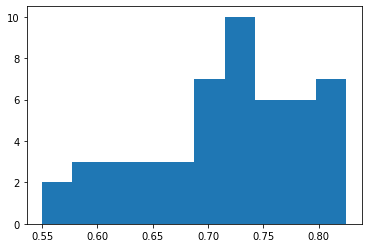

In [15]:
# Reimplement the DecisionTreeClassifier from Task 1 to evaluate based on cross-validation

start = time.time()
clf_des = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
n_scores_des = cross_val_score(clf_des, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
end = time.time()
print('Time spent: '+str(end-start))
print('Accuracy: %.3f (%.3f)' % (mean(n_scores_des), std(n_scores_des)))
fig, ax = plt.subplots()
ax.hist(n_scores_ada)
plt.show()


By comparing the three models using k-fold cross validation, it is clear that Random Forest Classifier has the best accuracy score. Ada Boost Classifier wins over Decision Tree Classifier by a small percent. The k-fold cross validation is suited for the dataset because of the following reasons. Firstly, the dataset is not huge, and doing the train-test data partitioning is not something I wish to compromise. Secondly, the k-fold cross validation is a great method to avoid overfitting and capturing noises.

In addition, Decision Tree Classifier has the fastest runtime. This does not come as a surprise since it only has one model to create while th other two many.

Another metric that we can choose is the f1 score. The f1 score takes into account both the precision and the recall.

In [55]:
from sklearn.metrics import f1_score
print(f1_score(y_test, model_ran.predict(X_test)))
print(f1_score(y_test, model_ada.predict(X_test)))
print(f1_score(y_test, clf_des.predict(X_test)))

0.7763157894736841
0.7114093959731544
0.717948717948718


Based on the result above, Random Forest Classifier has the highest score, the two others have similar scores. 